Epoch 1/50
94/94 [==============================] - 1s 5ms/step - loss: 0.0242
Epoch 2/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 3/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 5/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 6/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 7/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 8/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 9/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 10/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 11/50
94/94 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 12/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 13/50
94/94 [==============================

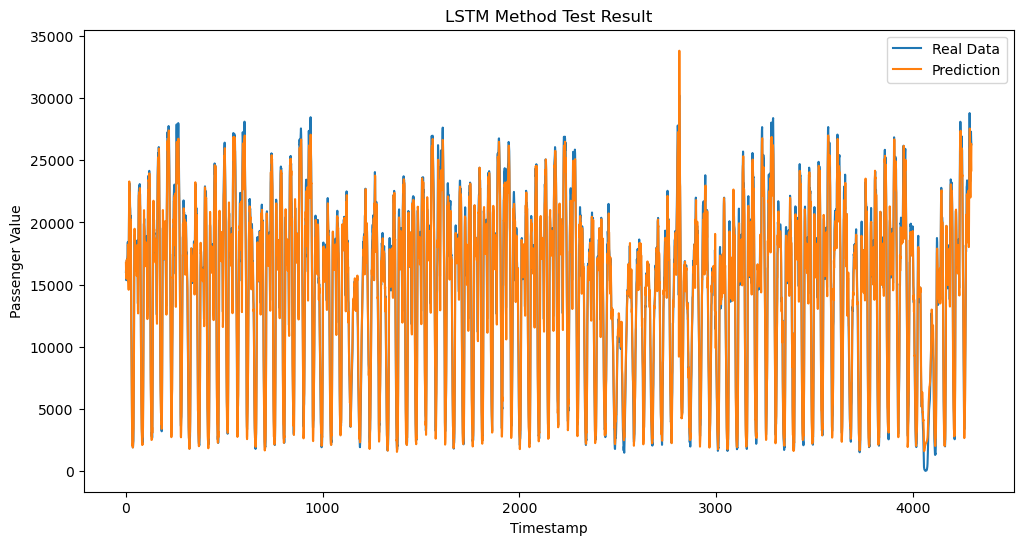

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("nyc_taxi.csv")

data = data[['value']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.7)
train_data, test_data = data[:6000], data[6000:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 20
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)


y_pred = model.predict(X_test)


y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real Data')
plt.plot(y_pred, label='Prediction')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Value')
plt.title('LSTM Method Test Result')
plt.legend()
plt.show()